# Face Mask Detection

Dataset: https://www.kaggle.com/andrewmvd/face-mask-detection

Load the dataset

In [1]:
import os
import cv2

DATASET_DIR = "data"
CATEGORIES = ["with_mask", "without_mask"]

data = []

for category in CATEGORIES:
    path = os.path.join(DATASET_DIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        data.append([image, class_num])

Prepare the data for training

In [4]:
import random
import numpy as np

random.shuffle(data)

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

X = X.astype('float32') / 255.0

from tensorflow.keras.utils import to_categorical

y = to_categorical(y)

Define the model architecture

In [5]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

9412608/9406464 [==============================] - 0s 0us/step


Train the model

In [7]:
history = model.fit(X, y, epochs=10, validation_split=0.2)

Epoch 1/10
35/35 [==============================] - 35s 923ms/step - loss: 0.3059 - accuracy: 0.9682 - val_loss: 1.0842 - val_accuracy: 0.9783
Epoch 2/10
35/35 [==============================] - 31s 878ms/step - loss: 0.0759 - accuracy: 0.9964 - val_loss: 0.9307 - val_accuracy: 0.9855
Epoch 3/10
35/35 [==============================] - 32s 929ms/step - loss: 0.1474 - accuracy: 0.9964 - val_loss: 0.8862 - val_accuracy: 0.9746
Epoch 4/10
35/35 [==============================] - 33s 932ms/step - loss: 0.0450 - accuracy: 0.9955 - val_loss: 0.3136 - val_accuracy: 0.9891
Epoch 5/10
35/35 [==============================] - 32s 933ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.4128 - val_accuracy: 0.9891
Epoch 6/10
35/35 [==============================] - 32s 905ms/step - loss: 6.3695e-07 - accuracy: 1.0000 - val_loss: 0.4080 - val_accuracy: 0.9891
Epoch 7/10
35/35 [==============================] - 31s 883ms/step - loss: 5.6208e-08 - accuracy: 1.0000 - val_loss: 0.4079 - val_accuracy

Test the model

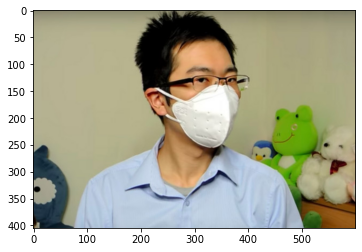

Without mask


In [6]:
import cv2
import matplotlib.pyplot as plt

TEST_IMAGE_PATH = "data\\test\\maksssksksss6.png"

img = cv2.imread(TEST_IMAGE_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)
plt.show()

img = cv2.resize(img, (224, 224))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)

predictions = model.predict(img)

if predictions[0][0] > predictions[0][1]:
    print("With mask")
else:
    print("Without mask")